In [ ]:
!pip install squarify   ## per installare squarify

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


a. visualizzare il numero totale di record presenti nel file

In [ ]:
url = "https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/consegne-vaccini-latest.csv"
df = pd.read_csv(url)
df

,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,Pfizer/BioNTech,135,2020-12-27,ITF,ITF1,13,Abruzzo
1,ABR,Pfizer/BioNTech,7800,2020-12-30,ITF,ITF1,13,Abruzzo
2,ABR,Pfizer/BioNTech,3900,2021-01-05,ITF,ITF1,13,Abruzzo
3,ABR,Pfizer/BioNTech,3900,2021-01-07,ITF,ITF1,13,Abruzzo
4,ABR,Pfizer/BioNTech,3900,2021-01-11,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
5278,VEN,Moderna,-1200,2021-10-11,ITH,ITH3,5,Veneto
5279,VEN,Moderna,1,2021-10-13,ITH,ITH3,5,Veneto
5280,VEN,Moderna,8,2021-10-14,ITH,ITH3,5,Veneto
5281,VEN,Pfizer/BioNTech,4,2021-10-15,ITH,ITH3,5,Veneto


In [ ]:
len(df.index)

5283

b. visualizzare il numero di record presenti relativi ad una regione inserita dall'utente

In [ ]:

reg = input("inserire regione: ")


df.loc[df["nome_area"] == reg]

inserire regione: Marche


,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
3032,MAR,Pfizer/BioNTech,200,2020-12-27,ITI,ITI3,11,Marche
3033,MAR,Pfizer/BioNTech,8775,2020-12-30,ITI,ITI3,11,Marche
3034,MAR,Pfizer/BioNTech,6825,2021-01-05,ITI,ITI3,11,Marche
3035,MAR,Pfizer/BioNTech,1950,2021-01-07,ITI,ITI3,11,Marche
3036,MAR,Pfizer/BioNTech,9750,2021-01-12,ITI,ITI3,11,Marche
...,...,...,...,...,...,...,...,...
3146,MAR,Moderna,10913,2021-09-22,ITI,ITI3,11,Marche
3147,MAR,Pfizer/BioNTech,32760,2021-09-22,ITI,ITI3,11,Marche
3148,MAR,Moderna,33700,2021-09-29,ITI,ITI3,11,Marche
3149,MAR,Pfizer/BioNTech,81900,2021-09-29,ITI,ITI3,11,Marche


c. modificare l'esercizio precedente per rispondere con un messaggio appropriato se la regione non è presente

In [ ]:
reg = input("inserire regione: ")

exists = reg in df.nome_area
print(exists)

          ##########           Sbagliato

inserire regione: Abruzzo
False


d. visualizzare il numero totale di vaccini consegnati in una regione inserita dall'utente

In [ ]:
reg = input()

df.loc[df["nome_area"] == reg]["numero_dosi"].sum()

Abruzzo


2267252

e. visualizzare il numero di vaccini per ogni fornitore

In [ ]:
df.groupby('fornitore')['numero_dosi'].sum()

fornitore
Janssen                     1846104
Moderna                    15235940
Pfizer/BioNTech            71327408
Vaxzevria (AstraZeneca)    11544591
Name: numero_dosi, dtype: int64

f.  visualizzare il numero di vaccini per ogni fornitore di una regione inserita dall'utente. Ordinare in ordine
decrescente sul numero di vaccini

In [ ]:
reg = input("inserire nome_area: ")

df[df["nome_area"] == reg].groupby("fornitore")["numero_dosi"].sum().sort_values(ascending = False)

inserire nome_area: Abruzzo


fornitore
Pfizer/BioNTech            1575702
Moderna                     357200
Vaxzevria (AstraZeneca)     298450
Janssen                      35900
Name: numero_dosi, dtype: int64

g. visualizzare le informazioni dell'esercizio 6 con un grafico a barre

In [ ]:
df2 = df[df["nome_area"] == reg].groupby("fornitore")["numero_dosi"].sum().sort_values(ascending = False)
df2

fornitore
Pfizer/BioNTech            1575702
Moderna                     357200
Vaxzevria (AstraZeneca)     298450
Janssen                      35900
Name: numero_dosi, dtype: int64

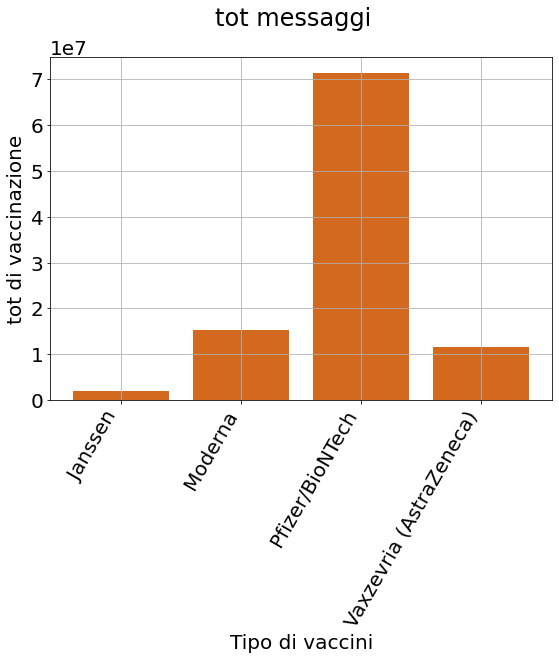

In [ ]:
df2 = df.groupby("fornitore").sum()
df2

#  ingrandisce tutto di 50% visto che il default del size di tutto è 10
plt.rcParams.update({"font.size" : 20})

#  crea la figura
fig = plt.figure(figsize=(9,7))

#  crea gli assi
ax = plt.axes()

#  crea le barre
#  color = "chocolate" per cambiare il colore delle barre
#  dentro le virgolette mettere nome di un colore dalla tabella di cssdegli colori
ax.bar(df2.index, df2["numero_dosi"], color="chocolate")

#  ruota i label o i nomi dell'asse x
fig.autofmt_xdate(rotation=60) 

#  crea un titolo nell'asse x
ax.set_xlabel("Tipo di vaccini")

#  crea un titolo nell'asse y
ax.set_ylabel("tot di vaccinazione")

#  crea una griglia
ax.grid()

#  crea un titolo
fig.suptitle("tot messaggi")

plt.show()

h. visualizzare le informazioni dell'esercizio 6 con un grafico a torta

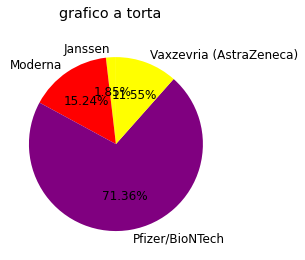

In [ ]:
plt.rcParams.update({"font.size" : 12})

data = df.groupby("fornitore").sum()

fig = plt.figure()
ax = plt.axes()

#  autopct = "%1.1f%%"  ----->    nelle virgolette il primo 1 è la lontananza dei percentuali
#  startangle = 90   ------>    per ruotare il grafico
#  colors = ["yellow", "red","purple"]    ------->   per colorare il grafico e si alternano
#  si scrive con l'= perche possiamo scrivere le funzioni senza ordine
ax.pie(data["numero_dosi"],labels = data.index, autopct = "%1.2f%%", startangle = 90, colors = ["yellow", "red","purple"])

fig.suptitle("grafico a torta")

plt.show()

i. visualizzare le informazioni dell'esercizio 6 con un grafico treemap

In [ ]:
import squarify as sqf  ## per importare

<function matplotlib.pyplot.show>

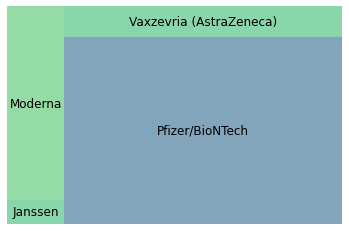

In [ ]:
size = list(df2["numero_dosi"])
nomi = list(df2.index)
sqf.plot(sizes = size, label = nomi, alpha = 0.6)
plt.axis("off")
plt.show

j. visualizzare i nomi delle tre regioni in cui sono stati consegnati più vaccini

In [ ]:
df3 = df.groupby("nome_area")["numero_dosi"].sum().sort_values(ascending = False)
df3.iloc[:3]

nome_area
Lombardia    17274689
Lazio        10332809
Campania      9179718
Name: numero_dosi, dtype: int64

k.  visualizzare i nomi delle regioni in cui sono stati consegnati un numero di vaccini inferiore alla media

In [ ]:
somma = df["numero_dosi"].sum()
media = somma / 21

print(media)

4759716.333333333


In [ ]:
somma = df["numero_dosi"].sum()
media = somma / 21

df4 = df.groupby("nome_area").sum()
df4 = df4.drop(columns = ["codice_regione_ISTAT"])
df4.loc[df4["numero_dosi"] >= media]

,numero_dosi
nome_area,
Campania,9179718
Emilia-Romagna,7329514
Lazio,10332809
Lombardia,17274689
Piemonte,7131660
Puglia,6876229
Sicilia,7649473
Toscana,6307555
Veneto,8088672


l. visualizzare il grafico delle consegne dei vaccini in Lombardia e nel Lazio. Visualizzare solo i dati delle
consegne avvenute negli utlimi sei mesi. Fare in modo che la data sia determinata in modo automatico

In [ ]:
df


,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,Pfizer/BioNTech,135,2020-12-27,ITF,ITF1,13,Abruzzo
1,ABR,Pfizer/BioNTech,7800,2020-12-30,ITF,ITF1,13,Abruzzo
2,ABR,Pfizer/BioNTech,3900,2021-01-05,ITF,ITF1,13,Abruzzo
3,ABR,Pfizer/BioNTech,3900,2021-01-07,ITF,ITF1,13,Abruzzo
4,ABR,Pfizer/BioNTech,3900,2021-01-11,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
5278,VEN,Moderna,-1200,2021-10-11,ITH,ITH3,5,Veneto
5279,VEN,Moderna,1,2021-10-13,ITH,ITH3,5,Veneto
5280,VEN,Moderna,8,2021-10-14,ITH,ITH3,5,Veneto
5281,VEN,Pfizer/BioNTech,4,2021-10-15,ITH,ITH3,5,Veneto
